# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
## For store type create dummy variables, but for assortment level do numerical encoding (1,2,3)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
store_data = pd.read_csv('/content/drive/MyDrive/Almabetter learning/Retail Sales Prediction/Rossmann Stores Data.csv')
stores = pd.read_csv('/content/drive/MyDrive/Almabetter learning/Retail Sales Prediction/store.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
#store_data['StateHoliday'].unique()
#store_data['StateHoliday'] = store_data['StateHoliday'].map({0:'0', 'a':'a', 'b':'b', 'c':'c', '0':'0'})
## Convert date column from object to date
store_data['Date']= pd.to_datetime(store_data['Date'])

In [5]:
store_data['Year'] = pd.DatetimeIndex(store_data['Date']).year
store_data['Month'] = pd.DatetimeIndex(store_data['Date']).month

In [ ]:
store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7


In [7]:
#df_date_sorted_agg=
df_date_sorted_agg=store_data.copy().sort_values(['Date']).groupby('Date')['Sales'].sum()

In [25]:
df_date_sorted_agg

Date
2013-01-01       97235
2013-01-02     6949829
2013-01-03     6347820
2013-01-04     6638954
2013-01-05     5951593
                ...   
2015-07-27    10707292
2015-07-28     9115073
2015-07-29     8499962
2015-07-30     8798854
2015-07-31    10109742
Name: Sales, Length: 942, dtype: int64

In [38]:
## Trying to get a series for plotting agg sales day wise, check any pattern to add varibale like seasonality
df=df_date_sorted_agg.reset_index()
df['Sales']=(df['Sales']-df['Sales'].min())/(df['Sales'].max()-df['Sales'].min())
df.head()

,Date,Sales
0,2013-01-01,0.000000
1,2013-01-02,0.441354
2,2013-01-03,0.402580
3,2013-01-04,0.421331
4,2013-01-05,0.377060


In [39]:
df=df.set_index('Date')

In [40]:
df.head()

,Sales
Date,
2013-01-01,0.000000
2013-01-02,0.441354
2013-01-03,0.402580
2013-01-04,0.421331
2013-01-05,0.377060


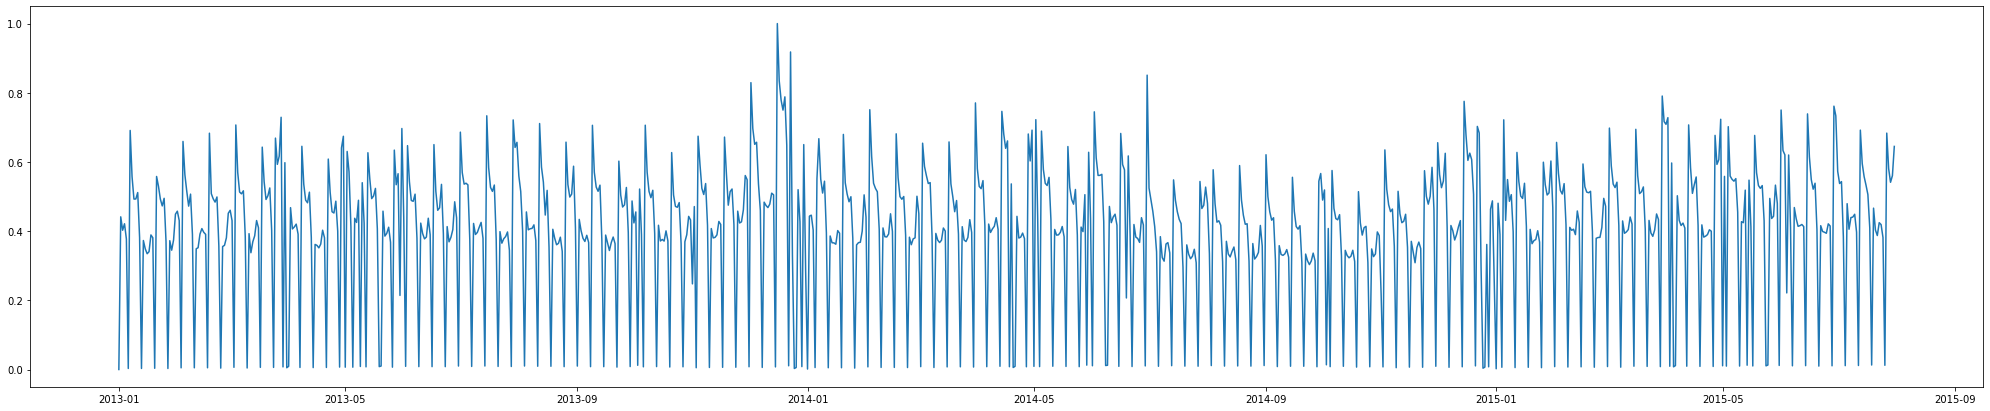

In [41]:
plt.figure(figsize=(35, 7))
plt.plot(df)

In [ ]:
from scipy.interpolate import make_interp_spline, BSpline


In [ ]:
df_test=store_data.copy()

In [ ]:
## Sorted values Store and Date wise to get previous day sales
df_test=df_test.sort_values(['Store','Date'])

In [ ]:
df_test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
1016095,1,2,2013-01-01,0,0,0,0,a,1,2013,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1,2013,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1,2013,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1,2013,1
1011635,1,6,2013-01-05,4997,635,1,0,0,1,2013,1


In [ ]:
#df_test['Sales_prev_day']=pd.DataFrame(df_test.set_index(['Store','Date'])['Sales'].shift(1,fill_value=999).values) #reset_index()['Sales']
df_test2=df_test.set_index(['Store','Date'])['Sales'].shift(1,fill_value=999).reset_index()
df_test=pd.merge(df_test,df_test2,on=['Store','Date'])

In [ ]:
df_test.head()

,Store,DayOfWeek,Date,Sales_x,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Sales_y
0,1,2,2013-01-01,0,0,0,0,a,1,2013,1,999
1,1,3,2013-01-02,5530,668,1,0,0,1,2013,1,0
2,1,4,2013-01-03,4327,578,1,0,0,1,2013,1,5530
3,1,5,2013-01-04,4486,619,1,0,0,1,2013,1,4327
4,1,6,2013-01-05,4997,635,1,0,0,1,2013,1,4486


In [ ]:
Sales_year_month=df_test.groupby(['Year','Month'])['Sales_x'].sum().reset_index()

In [ ]:
Sales_year_month.head(3)

,Year,Month,Sales_x
0,2013,1,180132207
1,2013,2,171534275
2,2013,3,201180369


In [ ]:
Sales_year_month['Year'].unique()

array([2013, 2014, 2015])

In [ ]:
#### Do we observe any pattern in sales across years, ## No

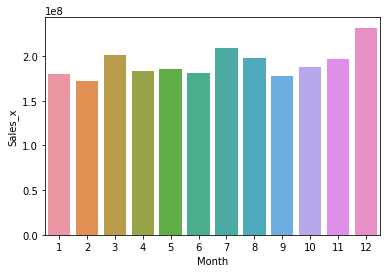

In [ ]:
sns.barplot(data=Sales_year_month[Sales_year_month['Year']==2013],x='Month',y='Sales_x')

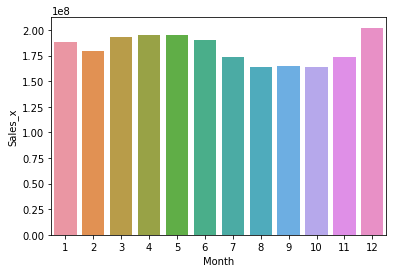

In [ ]:
sns.barplot(data=Sales_year_month[Sales_year_month['Year']==2014],x='Month',y='Sales_x')

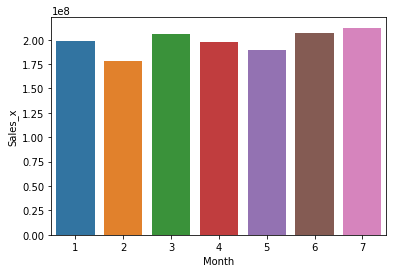

In [ ]:
sns.barplot(data=Sales_year_month[Sales_year_month['Year']==2015],x='Month',y='Sales_x')

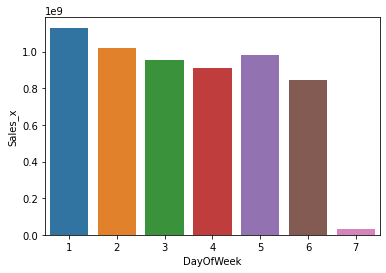

In [ ]:
sns.barplot(data=df_test.groupby(['DayOfWeek'])['Sales_x'].sum().reset_index(),x='DayOfWeek',y='Sales_x')  ## Starts with Monday

In [ ]:
#store_data.groupby(['Year','Month']).agg({'Sales':'sum'}).T

In [ ]:
## Just to check promo interval values and corresponding Promo2SinceWeek
#stores[stores['PromoInterval']!=0].head()

In [ ]:
stores

In [ ]:
stores.shape

(1115, 10)

In [ ]:
stores.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
stores[(stores['Promo2']==0) & (stores['Promo2SinceWeek'].isna())].shape

(544, 10)

In [ ]:
stores[stores['CompetitionOpenSinceMonth'].isna()]['Store'].nunique()

354

In [ ]:
## Wherever Promo2 ie continuing and consecutive promotion is zero, implies store didn't participate,
# hence Promo2SinceWeek and Promo2SinceYear should be zero, also there won't be PromoInterval
stores.loc[(stores['Promo2']==0) & (stores['Promo2SinceWeek'].isna()),['Promo2SinceWeek']]=0
stores.loc[(stores['Promo2']==0) & (stores['Promo2SinceYear'].isna()),['Promo2SinceYear','PromoInterval']]=0

In [ ]:
stores.loc[stores['CompetitionDistance'].isna()]=stores['CompetitionDistance'].max()#CompetitionDistance

In [ ]:
stores.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    351
CompetitionOpenSinceYear     351
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                  0
CompetitionOpen                0
promoYearWeek                  0
dtype: int64

In [ ]:
#stores[stores['Promo2SinceYear']!=0]['Promo2SinceYear'].describe()

In [ ]:
## Check the CompetitionOpenSinceYear year range
stores['CompetitionOpenSinceYear'].describe()

count     761.000000
mean     2008.668857
std         6.195983
min      1900.000000
25%      2006.000000
50%      2010.000000
75%      2013.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64

In [ ]:
#stores[~stores['CompetitionOpenSinceYear'].isin([1900,1961])]['CompetitionOpenSinceYear'].min()

In [ ]:
store_data['Date'].min()

Timestamp('2013-01-01 00:00:00')

In [ ]:
stores[stores['Promo2SinceYear']!=0]['Promo2SinceYear'].min()

In [ ]:
### Ref https://www.kaggle.com/shivam017arora/rossmann-sales-prediction-top-1-solution

competition_open = []
for index, value in stores[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].iterrows():
    try:
        year, month = int(value['CompetitionOpenSinceYear']), int(value['CompetitionOpenSinceMonth'])
        date = pd.to_datetime("{}-{}-01".format(year, month), format='%Y-%m')
        competition_open.append(date)
    except:
        competition_open.append('1813-01-01') # Added a dummy date, 200 yrs less than min sales date
stores['CompetitionOpen'] = pd.Series(competition_open)
stores['CompetitionOpen'] = stores['CompetitionOpen'].dt.strftime('%Y-%m-%d')
stores['CompetitionOpen']= pd.to_datetime(stores['CompetitionOpen'])
#stores['CompetitionOpen']=stores['CompetitionOpen'].map(int)
#stores['CompetitionOpen']=stores['CompetitionOpen'].apply(lambda x:x if x!='2021-10-30' else 0)




promo = []
for index, value in stores[['Promo2SinceWeek', 'Promo2SinceYear']].iterrows():
    try:
        year, week = int(value['Promo2SinceYear']), int(value['Promo2SinceWeek'])
        date = pd.to_datetime("{}{}0".format(year, week), format='%Y%W%w')
        promo.append(date)
    except:
        promo.append('1909-01-01')   ## dummy date
stores['promoYearWeek'] = pd.to_datetime(pd.Series(promo))
stores['promoYearWeek'] = stores['promoYearWeek'].dt.strftime('%Y%m%d')
stores['promoYearWeek']= pd.to_datetime(stores['promoYearWeek'])
#stores.loc[stores['promoYearWeek'].isna(),'promoYearWeek'] =0# stores['promoYearWeek'].dt.strftime('%Y%m%d')
#stores['promoYearWeek']=stores['promoYearWeek'].map(int)

In [ ]:

def competition_open_yr_mnth(a,b):
  try:
    year, month = int(a), int(b)
    date = pd.to_datetime("{}-{}-01".format(year, month), format='%Y-%m')
    return date
  except:
    return '1813-01-01'

stores['CompetitionOpen_yr_mnth'] =stores[['CompetitionOpenSinceYear','CompetitionOpenSinceMonth']].apply(competition_open_yr_mnth(x),)
stores['CompetitionOpen_yr_mnth'] = stores['CompetitionOpen_yr_mnth'].dt.strftime('%Y-%m-%d')
stores['CompetitionOpen_yr_mnth']= pd.to_datetime(stores['CompetitionOpen_yr_mnth'])


NameError: ignored

In [ ]:
## Merge part
date_test=pd.merge(store_data,stores,on='Store')
date_test['day_diff_comp']=(date_test['Date']-date_test['CompetitionOpen']).dt.days
date_test['day_diff_promo']=(date_test['Date']-date_test['promoYearWeek']).dt.days
date_test.loc[date_test['day_diff_comp']>=73000,'day_diff_comp']=0
date_test.loc[date_test['day_diff_promo']>=36500,'day_diff_promo']=0

In [ ]:
date_test[date_test['promoYearWeek']=='1909-01-01'].shape

(508031, 24)

In [ ]:
date_test[date_test['CompetitionOpen']=='1813-01-01'].shape   #(323348, 22)
#date_test['day_diff']
date_test[date_test['day_diff']>=73000].shape

(323348, 22)

In [ ]:
date_test[(date_test['Promo2SinceWeek']==0) & (date_test['Promo2SinceYear']==0)].shape

(508031, 24)

2009.0

In [ ]:
stores['promoYearWeek'].isna().sum()  #CompetitionOpen   #promoYearWeek

544

In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      1115 non-null   int64         
 1   StoreType                  1115 non-null   object        
 2   Assortment                 1115 non-null   object        
 3   CompetitionDistance        1112 non-null   float64       
 4   CompetitionOpenSinceMonth  761 non-null    float64       
 5   CompetitionOpenSinceYear   761 non-null    float64       
 6   Promo2                     1115 non-null   int64         
 7   Promo2SinceWeek            1115 non-null   float64       
 8   Promo2SinceYear            1115 non-null   float64       
 9   PromoInterval              1115 non-null   object        
 10  CompetitionOpen            1115 non-null   datetime64[ns]
 11  promoYearWeek              571 non-null    object        
dtypes: dat

In [ ]:
#stores['CompetitionOpen'].astype(int).describe()

In [ ]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2008-09-01
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2007-11-01
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2006-12-01
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2009-09-01
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015-04-01


In [ ]:
## Check the CompetitionOpenSinceMonth values
#stores['CompetitionOpenSinceMonth'].describe() ## 1 to 12
#stores[stores['CompetitionOpenSinceMonth']<=3]

In [ ]:
#stores[stores['CompetitionOpenSinceYear']==1900]

In [ ]:
## For interval, will think afterwards
#join_with = stores['PromoInterval'].str.split(',').apply(pd.Series)
#join_with.columns = join_with.columns.map(lambda x: str(x) + '_PromoInterval')

In [ ]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
store_data_merged=pd.merge(store_data,stores,on='Store')

In [ ]:
store_data_merged['day_diff_comp']=(store_data_merged['Date']-store_data_merged['CompetitionOpen']).dt.days
store_data_merged['day_diff_promo']=(store_data_merged['Date']-store_data_merged['promoYearWeek']).dt.days
store_data_merged.loc[store_data_merged['day_diff_comp']>=73000,'day_diff_comp']=0
store_data_merged.loc[store_data_merged['day_diff_promo']>=36500,'day_diff_promo']=0

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


In [ ]:
store_data_merged.drop(columns=['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpen','promoYearWeek'],inplace=True)

In [ ]:
#store_data.drop(columns='Date',inplace=True)
store_data_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,StoreType,Assortment,CompetitionDistance,Promo2,day_diff_comp,day_diff_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,c,a,1270.0,0,2524,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,7,c,a,1270.0,0,2523,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,7,c,a,1270.0,0,2522,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,7,c,a,1270.0,0,2521,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,7,c,a,1270.0,0,2520,0


In [ ]:
store_data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1014567 entries, 0 to 1014566
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1014567 non-null  int64         
 1   DayOfWeek            1014567 non-null  int64         
 2   Date                 1014567 non-null  datetime64[ns]
 3   Sales                1014567 non-null  int64         
 4   Customers            1014567 non-null  int64         
 5   Open                 1014567 non-null  int64         
 6   Promo                1014567 non-null  int64         
 7   StateHoliday         1014567 non-null  object        
 8   SchoolHoliday        1014567 non-null  int64         
 9   Year                 1014567 non-null  int64         
 10  Month                1014567 non-null  int64         
 11  StoreType            1014567 non-null  object        
 12  Assortment           1014567 non-null  int64         
 1

In [ ]:
store_data_merged['CompetitionDistance']=store_data_merged['CompetitionDistance'].astype(int)

In [ ]:
store_data_merged['Assortment']=store_data_merged['Assortment'].apply(lambda x: 1 if x=='a' else (2 if x=='b' else 3))

In [ ]:
store_data_final=pd.get_dummies(store_data_merged,drop_first=True)

In [ ]:
store_data_final.isna().sum()


Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
SchoolHoliday          0
Year                   0
Month                  0
Assortment             0
CompetitionDistance    0
Promo2                 0
day_diff_comp          0
day_diff_promo         0
StateHoliday_0         0
StateHoliday_a         0
StateHoliday_b         0
StateHoliday_c         0
StoreType_b            0
StoreType_c            0
StoreType_d            0
dtype: int64

In [ ]:
############ Final Data

In [ ]:
#store_data[(store_data['StateHoliday'].isin(['0',0])) & (store_data['Open']==1)]

In [ ]:
## OPEN Stores with zero sales
#store_data[(store_data['Sales']==0) & (store_data['Open']==1)]  #SchoolHoliday

In [ ]:
## OPEN Stores with zero sales and SchoolHoliday
#store_data[(store_data['Sales']==0) & (store_data['Open']==1) & (store_data['SchoolHoliday']==1)]  #SchoolHoliday

In [ ]:
#sns.scatterplot(data=store_data,x='Customers',y='Sales')